<a href="https://colab.research.google.com/github/XaviPat01/MTL782_Data_Mining/blob/main/MTL782_Assignment1_Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MTL782: Assignment 1, Question 2**
Members:
- Saurabh Jha, 2020MT10845
- Vishvesh Patel, 2020MT60896
- Avi Patni, 2020MT60159


## Importing Necessary Libraries

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, ShuffleSplit
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
from sklearn.model_selection import GridSearchCV
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
from keras.datasets import mnist
from sklearn.svm import LinearSVC, SVC

## Load the MNIST Dataset

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
print("Shape of training data", X_train.shape)
print("Shape of training labels", y_train.shape)
print("Shape of testing data", X_test.shape)
print("Shape os testing labels", y_test.shape)

Shape of training data (60000, 28, 28)
Shape of training labels (60000,)
Shape of testing data (10000, 28, 28)
Shape os testing labels (10000,)


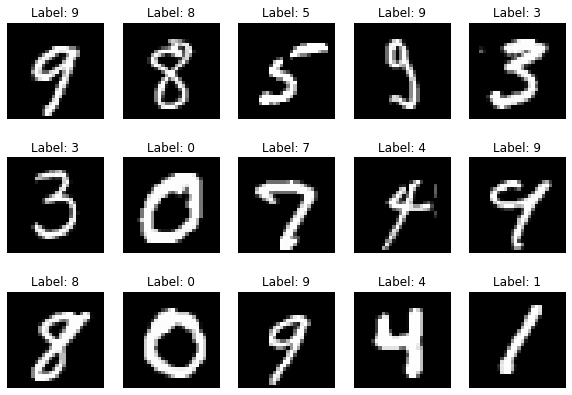

In [ ]:
#Plotting the digits
fig = plt.figure(figsize=(10,7))
for i in range(45,60):
  ax = fig.add_subplot(3,5,i-45+1)
  ax.imshow(X_train[i],cmap=plt.get_cmap('gray'))
  ax.set_title('Label: {y}'.format(y=y_train[i]))
  plt.axis('off')

## Preparing the dataset
We need to flatten the dataset to a 1D-array, thus each image of 28*28 would become a 1D array of 784

In [ ]:
x_train = X_train.flatten().reshape(60000,784)
x_test = X_test.flatten().reshape(10000,784)

## Helper Functions

In [ ]:
def eval(estimator,x_test,y_test, x_train, y_train):
  y_pred = estimator.predict(x_test)
  print("# Classification Report")
  print(metrics.classification_report(y_test,y_pred, zero_division=0))
  score = cross_val_score(estimator, x_train, y_train, cv = 3, n_jobs = -1, scoring = "accuracy")
  print("The cross-validation accuracy score is: ", f"{score.mean():.3f}", " with standard deviation: ", f"{score.std():.3f}")

  print("# Confusion Matrix")
  disp = ConfusionMatrixDisplay.from_estimator(estimator, x_test, y_test)

## Naive Bayes

In [ ]:
nb = make_pipeline(MinMaxScaler(),GaussianNB())
nb.fit(x_train, y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()), ('gaussiannb', GaussianNB())])

In [ ]:
y_predicted=nb.predict(x_test)

# Classification Report
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       980
           1       0.85      0.95      0.90      1135
           2       0.90      0.26      0.40      1032
           3       0.71      0.34      0.46      1010
           4       0.89      0.17      0.29       982
           5       0.54      0.05      0.09       892
           6       0.66      0.93      0.77       958
           7       0.88      0.27      0.41      1028
           8       0.28      0.68      0.40       974
           9       0.37      0.95      0.53      1009

    accuracy                           0.55     10000
   macro avg       0.69      0.55      0.51     10000
weighted avg       0.69      0.55      0.52     10000

The cross-validation accuracy score is:  0.557  with standard deviation:  0.002
# Confusion Matrix


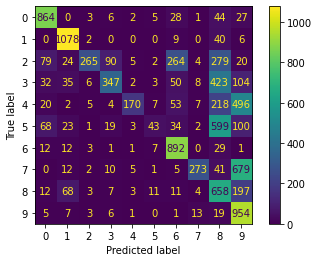

In [ ]:
eval(nb,x_test,y_test,x_train,y_train)

## KNN

Feature scaling is essential for machine learning algorithms that calculate distances between data. If not scaled, the feature with a higher value range starts dominating when calculating distances. KNN which uses Euclidean distance is one such algorithm which essentially require scaling

In [ ]:
pipe_knn = make_pipeline(MinMaxScaler(),KNeighborsClassifier())
grid_k = {'kneighborsclassifier__n_neighbors':[3,5,7,9]}
cv = GridSearchCV(pipe_knn, param_grid = grid_k, scoring = 'precision_macro', cv = 3, verbose = 1, n_jobs = 3)
cv.fit(x_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             n_jobs=3,
             param_grid={'kneighborsclassifier__n_neighbors': [3, 5, 7, 9]},
             scoring='precision_macro', verbose=1)

In [ ]:
# print(cv.cv_results_)
print("The optimal value for k is ", cv.best_params_)
print("The best estimator is", cv.best_estimator_)

The optimal value for k is  {'kneighborsclassifier__n_neighbors': 3}
The best estimator is Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=3))])


In [ ]:
pipe_knn = cv.best_estimator_
pipe_knn.fit(x_train,y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=3))])

# Classification Report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.96      1.00      0.98      1135
           2       0.98      0.97      0.97      1032
           3       0.96      0.97      0.96      1010
           4       0.98      0.97      0.97       982
           5       0.97      0.96      0.96       892
           6       0.98      0.99      0.98       958
           7       0.96      0.96      0.96      1028
           8       0.99      0.94      0.96       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

The cross-validation accuracy score is:  0.968  with standard deviation:  0.001
# Confusion Matrix


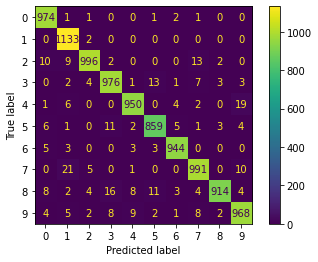

In [ ]:
eval(pipe_knn,x_test,y_test,x_train,y_train)

## SVC

In [ ]:
#Flatten to length 784
svc_x_train = x_train[0:10000,:]
svc_y_train = y_train[0:10000]
svc_x_test = x_test[0:2000,:]
svc_y_test = y_test[0:2000]

In [ ]:
pipe_1 = Pipeline([('scaler', MinMaxScaler()),("classifier",LinearSVC(random_state=42, tol=1e-4, max_iter = 8000))])
pipe_1.fit(x_train, y_train.ravel())

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('classifier', LinearSVC(max_iter=8000, random_state=42))])

# Classification Report
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       980
           1       0.96      0.98      0.97      1135
           2       0.93      0.89      0.91      1032
           3       0.90      0.91      0.90      1010
           4       0.92      0.93      0.92       982
           5       0.89      0.86      0.87       892
           6       0.93      0.95      0.94       958
           7       0.92      0.92      0.92      1028
           8       0.87      0.87      0.87       974
           9       0.90      0.89      0.89      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

The cross-validation accuracy score is:  0.910  with standard deviation:  0.002
# Confusion Matrix


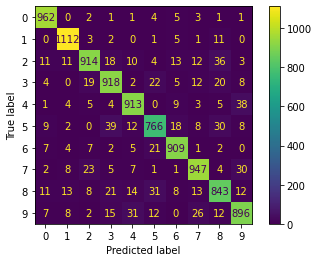

In [ ]:
eval(pipe_1,x_test,y_test,x_train,y_train)

## Decision Tree

In [ ]:
dt_pipeline = Pipeline([('scaler', MinMaxScaler()),("classifier",DecisionTreeClassifier())])
params_dt = {'classifier__max_depth':[6,12,18,24],'classifier__min_samples_leaf':[4,6,8]}
dt_cv = GridSearchCV(dt_pipeline, param_grid = params_dt, cv =3, n_jobs = -1, verbose = 1, scoring = "precision_macro")
dt_cv.fit(x_train, y_train)
print(dt_cv.best_params_)
dt = dt_cv.best_estimator_

Fitting 3 folds for each of 12 candidates, totalling 36 fits
{'classifier__max_depth': 18, 'classifier__min_samples_leaf': 4}


# Classification Report
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       980
           1       0.95      0.96      0.96      1135
           2       0.86      0.88      0.86      1032
           3       0.84      0.85      0.85      1010
           4       0.87      0.88      0.88       982
           5       0.83      0.85      0.84       892
           6       0.89      0.89      0.89       958
           7       0.92      0.90      0.91      1028
           8       0.84      0.79      0.81       974
           9       0.88      0.85      0.86      1009

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

The cross-validation accuracy score is:  0.863  with standard deviation:  0.001
# Confusion Matrix


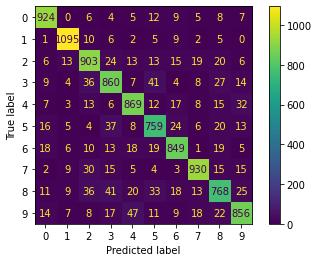

In [ ]:
eval(dt,x_test,y_test,x_train,y_train)

## Random Forest

In [ ]:
rf_pipeline = Pipeline([('scaler', MinMaxScaler()), ("classifier",RandomForestClassifier())])
params_rf = {'classifier__max_depth':[6,12,18,24],'classifier__n_estimators':[100,150,200],'classifier__min_samples_leaf':[4,6,8]}
rf_cv = GridSearchCV(rf_pipeline, param_grid = params_rf, cv =3, n_jobs = -1, verbose = 1, scoring = "precision_macro")
rf_cv.fit(x_train, y_train)
print(rf_cv.best_params_)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
{'classifier__max_depth': 24, 'classifier__min_samples_leaf': 4, 'classifier__n_estimators': 200}


# Classification Report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.95      0.97      0.96      1032
           3       0.96      0.96      0.96      1010
           4       0.97      0.97      0.97       982
           5       0.98      0.96      0.97       892
           6       0.97      0.98      0.98       958
           7       0.97      0.95      0.96      1028
           8       0.95      0.95      0.95       974
           9       0.95      0.95      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

The cross-validation accuracy score is:  0.960  with standard deviation:  0.002
# Confusion Matrix


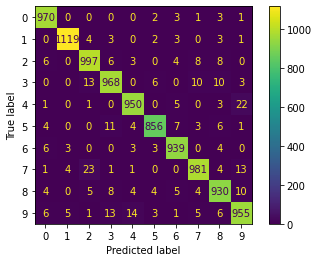

In [ ]:
rf = rf_cv.best_estimator_
eval(rf,x_test,y_test,x_train,y_train)

## ANN

In [ ]:
# ANN
import warnings
from sklearn.exceptions import ConvergenceWarning

from sklearn.neural_network import MLPClassifier
pipe_ann = make_pipeline(MinMaxScaler(), MLPClassifier(solver = 'sgd', alpha = 1e-4, max_iter=12, hidden_layer_sizes = (40,9), learning_rate_init = 0.2, random_state = 42))
params = {'mlpclassifier__alpha':[1e-3,1e-4,1e-5], 'mlpclassifier__learning_rate_init':[0.2, 0.1, 0.01]}
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
    ann_cv = GridSearchCV(pipe_ann, param_grid = params, cv = 3, n_jobs = -1, verbose = 1, scoring = "precision_macro")
    ann_cv.fit(x_train, y_train)
    print(ann_cv.best_params_)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
{'mlpclassifier__alpha': 1e-05, 'mlpclassifier__learning_rate_init': 0.1}


In [ ]:
pipe_ann = ann_cv.best_estimator_
print(pipe_ann)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('mlpclassifier',
                 MLPClassifier(alpha=1e-05, hidden_layer_sizes=(40, 9),
                               learning_rate_init=0.1, max_iter=12,
                               random_state=42, solver='sgd'))])


# Classification Report
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.96      0.97      1032
           3       0.98      0.96      0.97      1010
           4       0.98      0.96      0.97       982
           5       0.95      0.97      0.96       892
           6       0.97      0.98      0.98       958
           7       0.96      0.98      0.97      1028
           8       0.97      0.96      0.97       974
           9       0.95      0.97      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

The cross-validation accuracy score is:  0.961  with standard deviation:  0.000
# Confusion Matrix


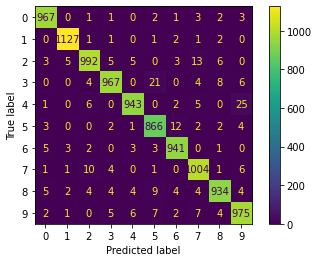

In [ ]:
eval(pipe_ann,x_test,y_test,x_train,y_train)